In [1]:
# shimon turchak - 205660525
# 313197014 netanel hajbi
# 318717535 ortal salman

In [2]:
!pip install python-bidi
!pip install matplotlib seaborn
!pip install --upgrade matplotlib

!pip install matplotlib==3.4.3
!pip install pillow
!pip install googletrans==4.0.0-rc1
!pip install transformers
!pip install tensorflow



from wordcloud import STOPWORDS
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import csv
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bidi.algorithm import get_display  # For text direction in Hebrew
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
import seaborn as sns
from nltk.corpus import words
from PIL import Image
from nltk.draw.dispersion import dispersion_plot
import random
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize, sent_tokenize
!pip install pysentiment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


  Using cached matplotlib-3.7.5-cp38-cp38-win_amd64.whl (7.5 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
  Using cached matplotlib-3.4.3-cp38-cp38-win_amd64.whl (7.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5


In [3]:
#convert text into csv
def whatsapp_to_csv(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    data = []
    current_message = ""
    current_author = ""
    current_datetime = ""
    for line in lines:
        if line.startswith("[") and "]" in line:
            if current_message:
                data.append([current_datetime, current_author, current_message])
            parts = line.split("] ")
            if len(parts) > 1:
                current_datetime = parts[0].strip("[")
                author_message_parts = parts[1].split(": ", 1)
                if len(author_message_parts) > 1:
                    current_author = author_message_parts[0].strip()
                    current_message = author_message_parts[1].strip()
                else:
                    current_author = ""
                    current_message = ""
        else:
            current_message += " " + line.strip()
    if current_message:
        data.append([current_datetime, current_author, current_message])
    df = pd.DataFrame(data, columns=['DateTime', 'Author', 'Message'])
    df.to_csv(output_file, index=False, encoding='utf-8-sig')
input_file = 'chat.txt'  
output_file = 'pd.csv'
whatsapp_to_csv(input_file, output_file)

In [75]:
#saving & presenting
df = pd.read_csv('pd.csv')
df.head(80)
#100-1491
df4 = df
df4

DateTime                     Author  \
0       11.7.2023, 6:56:49  כו"ח - על כל שאלה תשובה 🎼   
1      21.8.2023, 17:32:38                  רועי מרלי   
2      8.10.2023, 22:22:51       יעל גורן (מפילדלפיה)   
3     22.10.2023, 23:15:45                  יניב פיבו   
4     22.10.2023, 23:20:16               ~ M.B.N. ltd   
...                    ...                        ...   
1562   7.11.2023, 11:40:51              דורית בן שלום   
1563   7.11.2023, 11:41:06                 רונן ברנוי   
1564   7.11.2023, 11:41:16                  יעקב וובר   
1565   7.11.2023, 12:00:33                   ~ Meitav   
1566   7.11.2023, 13:11:19             לירית שפיר שמש   

                                                Message  
0     ‏ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מח...  
1     ‏סקר: חברת *שידורית* זכתה במכרז של משרד הרווחה...  
2     האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...  
3                 ‫‏לירית שפיר שמש הסיר/ה את יניב פיבו‬  
4              ‫‏לירית שפיר שמש הסיר/ה את ~ M.B.N. ltd‬  
...                                                 ...  
1562  מה שהצעתי . מי שבחרדות עקב המצב שירכוש שעון וי...  
1563                        יאללה חמודים/ות... יאללה...  
1564             כמו שאמרתי אין השבע יודע את מצוקת הרעב  
1565  כי היא חכמה גדולה והבנה שלה מושלמת והבנה שלנו ...  
1566  שלום לכולם, כולנו בימים האלו רגישים והעצבים של...  

[1567 rows x 3 columns]

In [5]:
start_row = 1300  # Replace with the starting row index
end_row = 1491    # Replace with the ending row index

# Display information for the specified range of rows
df_range = df.iloc[start_row:end_row + 1]
df_range


DateTime             Author  \
1300  6.11.2023, 17:14:56           טל דויטש   
1301  6.11.2023, 17:15:27        ~ רועי היקר   
1302  6.11.2023, 17:15:37          ריקה שובל   
1303  6.11.2023, 17:15:49            לאה לוי   
1304  6.11.2023, 17:17:43  ~ ספיר אלה סייביץ   
...                   ...                ...   
1487  6.11.2023, 22:51:53           ~ Meitav   
1488  6.11.2023, 22:52:18      דורית בן שלום   
1489  6.11.2023, 22:52:46      דורית בן שלום   
1490  6.11.2023, 22:53:51           ~ Meitav   
1491  6.11.2023, 22:55:27      דורית בן שלום   

                                                Message  
1300  בקיצור תהיו עירניים תיעזרו בשכן שיצלצל לכם באי...  
1301  תהפכו את הקבוצות האלה לרוטטות (מי שלא שומע כלו...  
1302                אנשים אנחנו אופטימים ככה צריך להיות  
1303  סליחה! אתם מעבירים מידע בהודעות סרק על התנהלות...  
1304                                        זה רק ילחיץ  
...                                                 ...  
1487                                   בעיניי מכבד מאוד  
1488                                אז יש לך בעיה בהבנה  
1489         מוזמנת לדפדף הלאה ולא להגיב לי יותר . תודה  
1490                               הבנה שלך מצוינת מאוד  
1491                                 תקראי תגובה מעלייך  

[192 rows x 3 columns]

In [6]:
# Tokenize by words #

nltk.download('punkt')

# Tokenize the messages
df['Tokenized_Message'] = df['Message'].apply(lambda x: word_tokenize(x))
df


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ortal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


DateTime                     Author  \
0       11.7.2023, 6:56:49  כו"ח - על כל שאלה תשובה 🎼   
1      21.8.2023, 17:32:38                  רועי מרלי   
2      8.10.2023, 22:22:51       יעל גורן (מפילדלפיה)   
3     22.10.2023, 23:15:45                  יניב פיבו   
4     22.10.2023, 23:20:16               ~ M.B.N. ltd   
...                    ...                        ...   
1562   7.11.2023, 11:40:51              דורית בן שלום   
1563   7.11.2023, 11:41:06                 רונן ברנוי   
1564   7.11.2023, 11:41:16                  יעקב וובר   
1565   7.11.2023, 12:00:33                   ~ Meitav   
1566   7.11.2023, 13:11:19             לירית שפיר שמש   

                                                Message  \
0     ‏ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מח...   
1     ‏סקר: חברת *שידורית* זכתה במכרז של משרד הרווחה...   
2     האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...   
3                 ‫‏לירית שפיר שמש הסיר/ה את יניב פיבו‬   
4              ‫‏לירית שפיר שמש הסיר/ה את ~ M.B.N. ltd‬   
...                                                 ...   
1562  מה שהצעתי . מי שבחרדות עקב המצב שירכוש שעון וי...   
1563                        יאללה חמודים/ות... יאללה...   
1564             כמו שאמרתי אין השבע יודע את מצוקת הרעב   
1565  כי היא חכמה גדולה והבנה שלה מושלמת והבנה שלנו ...   
1566  שלום לכולם, כולנו בימים האלו רגישים והעצבים של...   

                                      Tokenized_Message  
0     [‏ההודעות, והשיחות, מוצפנות, מקצה, לקצה, ., לא...  
1     [‏סקר, :, חברת, *, שידורית, *, זכתה, במכרז, של...  
2     [האם, יש, אפשרות, באפליקציה, לשנות, את, צליל, ...  
3         [‫‏לירית, שפיר, שמש, הסיר/ה, את, יניב, פיבו‬]  
4     [‫‏לירית, שפיר, שמש, הסיר/ה, את, ~, M.B.N, ., ...  
...                                                 ...  
1562  [מה, שהצעתי, ., מי, שבחרדות, עקב, המצב, שירכוש...  
1563                [יאללה, חמודים/ות, ..., יאללה, ...]  
1564    [כמו, שאמרתי, אין, השבע, יודע, את, מצוקת, הרעב]  
1565  [כי, היא, חכמה, גדולה, והבנה, שלה, מושלמת, והב...  
1566  [שלום, לכולם, ,, כולנו, בימים, האלו, רגישים, ו...  

[1567 rows x 4 columns]

In [7]:
#adding another filter-only tokenizing on word > 1
df['Tokenized_Message'] = df['Message'].apply(lambda x: [word for word in word_tokenize(x) if word.isalpha() and len(word) > 1])

#Display the DataFrame with the tokens column
df_token = (df[['Message', 'Tokenized_Message', 'DateTime', 'Author']])

display(df_token)
df.head(10)

Message  \
0     ‏ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מח...   
1     ‏סקר: חברת *שידורית* זכתה במכרז של משרד הרווחה...   
2     האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...   
3                 ‫‏לירית שפיר שמש הסיר/ה את יניב פיבו‬   
4              ‫‏לירית שפיר שמש הסיר/ה את ~ M.B.N. ltd‬   
...                                                 ...   
1562  מה שהצעתי . מי שבחרדות עקב המצב שירכוש שעון וי...   
1563                        יאללה חמודים/ות... יאללה...   
1564             כמו שאמרתי אין השבע יודע את מצוקת הרעב   
1565  כי היא חכמה גדולה והבנה שלה מושלמת והבנה שלנו ...   
1566  שלום לכולם, כולנו בימים האלו רגישים והעצבים של...   

                                      Tokenized_Message              DateTime  \
0     [והשיחות, מוצפנות, מקצה, לקצה, לאף, אחד, מחוץ,...    11.7.2023, 6:56:49   
1     [חברת, שידורית, זכתה, במכרז, של, משרד, הרווחה,...   21.8.2023, 17:32:38   
2     [האם, יש, אפשרות, באפליקציה, לשנות, את, צליל, ...   8.10.2023, 22:22:51   
3                                 [שפיר, שמש, את, יניב]  22.10.2023, 23:15:45   
4                                       [שפיר, שמש, את]  22.10.2023, 23:20:16   
...                                                 ...                   ...   
1562  [מה, שהצעתי, מי, שבחרדות, עקב, המצב, שירכוש, ש...   7.11.2023, 11:40:51   
1563                                     [יאללה, יאללה]   7.11.2023, 11:41:06   
1564    [כמו, שאמרתי, אין, השבע, יודע, את, מצוקת, הרעב]   7.11.2023, 11:41:16   
1565  [כי, היא, חכמה, גדולה, והבנה, שלה, מושלמת, והב...   7.11.2023, 12:00:33   
1566  [שלום, לכולם, כולנו, בימים, האלו, רגישים, והעצ...   7.11.2023, 13:11:19   

                         Author  
0     כו"ח - על כל שאלה תשובה 🎼  
1                     רועי מרלי  
2          יעל גורן (מפילדלפיה)  
3                     יניב פיבו  
4                  ~ M.B.N. ltd  
...                         ...  
1562              דורית בן שלום  
1563                 רונן ברנוי  
1564                  יעקב וובר  
1565                   ~ Meitav  
1566             לירית שפיר שמש  

[1567 rows x 4 columns]

DateTime                     Author  \
0    11.7.2023, 6:56:49  כו"ח - על כל שאלה תשובה 🎼   
1   21.8.2023, 17:32:38                  רועי מרלי   
2   8.10.2023, 22:22:51       יעל גורן (מפילדלפיה)   
3  22.10.2023, 23:15:45                  יניב פיבו   
4  22.10.2023, 23:20:16               ~ M.B.N. ltd   
5  22.10.2023, 23:22:43                     ~ Maya   
6  22.10.2023, 23:22:57                 תחיה קסטור   
7  22.10.2023, 23:23:11                  אילנה ברץ   
8  22.10.2023, 23:24:08              ~ Liora Neger   
9   23.10.2023, 9:56:43                  שחר דישבק   

                                             Message  \
0  ‏ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מח...   
1  ‏סקר: חברת *שידורית* זכתה במכרז של משרד הרווחה...   
2  האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...   
3              ‫‏לירית שפיר שמש הסיר/ה את יניב פיבו‬   
4           ‫‏לירית שפיר שמש הסיר/ה את ~ M.B.N. ltd‬   
5                 ‫‏לירית שפיר שמש הסיר/ה את ~ Maya‬   
6             ‫‏לירית שפיר שמש הסיר/ה את תחיה קסטור‬   
7              ‫‏לירית שפיר שמש הסיר/ה את אילנה ברץ‬   
8          ‫‏לירית שפיר שמש הסיר/ה את ~ Liora Neger‬   
9  בוקר טוב, אני רוצה לדווח לאח"א וקיבלתי תשובה א...   

                                   Tokenized_Message  
0  [והשיחות, מוצפנות, מקצה, לקצה, לאף, אחד, מחוץ,...  
1  [חברת, שידורית, זכתה, במכרז, של, משרד, הרווחה,...  
2  [האם, יש, אפשרות, באפליקציה, לשנות, את, צליל, ...  
3                              [שפיר, שמש, את, יניב]  
4                                    [שפיר, שמש, את]  
5                                    [שפיר, שמש, את]  
6                              [שפיר, שמש, את, תחיה]  
7                             [שפיר, שמש, את, אילנה]  
8                             [שפיר, שמש, את, Liora]  
9  [בוקר, טוב, אני, רוצה, לדווח, לאח, וקיבלתי, תש...

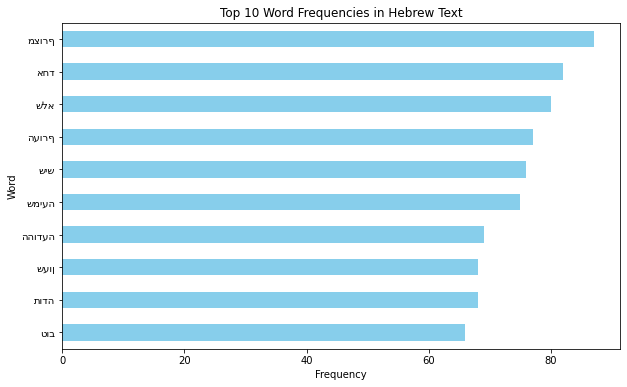

In [8]:
#10 most frequent words on text
text_column = 'Message'

# Text preprocessing for Hebrew
stop_words = set(stopwords.words('hebrew'))

def preprocess_hebrew_text(text):
    cleaned_words = [word for word in word_tokenize(str(text)) if word.isalpha() and word not in stop_words]
    return ' '.join(cleaned_words)

# Apply preprocessing
df['cleaned_text'] = df[text_column].apply(preprocess_hebrew_text)

# Check if there are any words left after preprocessing
if df['cleaned_text'].str.split().apply(len).sum() == 0:
    print("After preprocessing, there are no words left.")
else:
    # Create a bar chart for word frequencies only if there are words
    word_frequencies = pd.Series(' '.join(df['cleaned_text']).split()).value_counts().head(10)

plt.figure(figsize=(10, 6))
word_frequencies.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Word Frequencies in Hebrew Text')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [9]:
# top ten words - טוב, שעון, תודה, ההודעה, שמיעה, שיש, העורף, שלא, אחד, מצורף

In [10]:
# Create a list of space-separated strings (corpus)

tokenized_messages = df['Tokenized_Message']
corpus = tokenized_messages.apply(lambda x: ' '.join(x)).tolist()

In [11]:
# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the corpus into a bag-of-words representation
X = vectorizer.fit_transform(corpus)

# Create a DataFrame to display the results
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

# Sum the occurrences of each word
word_counts = bag_of_words_df.sum(axis=0)

# Create a DataFrame with two rows: words and counts
word_counts_df = pd.DataFrame({'Words': word_counts.index, 'Counts': word_counts.values})

# Save the DataFrame as a CSV file
word_counts_df.to_csv('word_counts.csv', index=False)


In [12]:
word_counts_df

Words  Counts
0           ab       1
1       active       1
2     amplifon       2
3         band       3
4      bettear       2
...        ...     ...
6225    תתקדמי       1
6226    תתקיים       2
6227      תתקן       2
6228     תתקשר       2
6229     תתרום       1

[6230 rows x 2 columns]

count    6230.000000
mean        3.315570
std        12.341072
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       492.000000
Name: Counts, dtype: float64


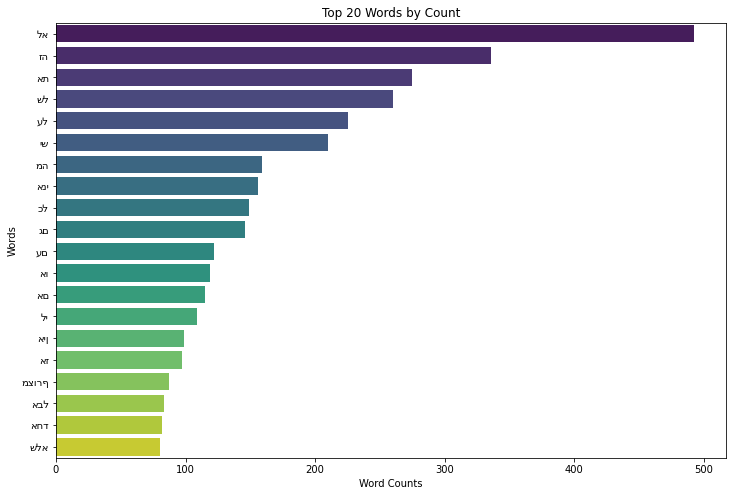

In [13]:
#EDA for the word_counts_df csv so we can understand it better

# Display basic statistics about the word counts
print(word_counts_df['Counts'].describe())



# Display the top 20 words by count
top_words = word_counts_df.sort_values(by='Counts', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Counts', y='Words', data=top_words, palette='viridis')
plt.title('Top 20 Words by Count')
plt.xlabel('Word Counts')
plt.ylabel('Words')
plt.show()


###Count: There are 6230 words in total.

###Mean: The average word appears around 3.32 times in your corpus.

###Standard Deviation (std): The standard deviation is relatively high (12.34), indicating a significant variation in the counts.

###Min: The minimum count for a word is 1.

###25%: 25% of the words have a count of 1 or less.

###50% (Median): The median count is 1, suggesting that a large portion of words occurs infrequently.

###75%: 75% of the words have a count of 2 or less.

###Max: The maximum count for a word is 492, indicating a few words are highly frequent in the corpus.

###for now the word לא appears the most

###we dound that are tabe contains 52 words in english out of 6230 in both anguages


In [15]:
#seperations of a few words
# top ten words - טוב, שעון, תודה, ההודעה, שמיעה, שיש, העורף, שלא, אחד, מצורף
# Replace 'your_corpus' with your actual list of words or sentences

# Tokenize the words using nltk
#tokens = nltk.word_tokenize(' '.join(corpus))

# Create a dispersion plot
#dispersion_plot(tokens, ["שעון", "מצורף", "לא", "העורף", "שמיעה"])

# Show the plot
#plt.show()

In [16]:
# manipulations on 'word_counts_df':


In [17]:
#removing english words:
hebrew_words_df = word_counts_df[word_counts_df['Words'].apply(lambda x: not all(ord(c) < 128 for c in x))]
hebrew_words_df

Words  Counts
52        אאוץ       1
53       אבדוק       6
54    אבולעפיה       2
55       אבחנה       4
56       אבטחה       1
...        ...     ...
6225    תתקדמי       1
6226    תתקיים       2
6227      תתקן       2
6228     תתקשר       2
6229     תתרום       1

[6178 rows x 2 columns]

In [18]:
#sorting by frequency
sorted_hebrew_words_df = hebrew_words_df.sort_values(by='Counts', ascending=False)
sorted_hebrew_words_df

Words  Counts
3100      לא     492
2504      זה     336
335       את     275
5705      של     260
4944      על     225
...      ...     ...
2593  חושבים       1
2591     חוש       1
2590    חורף       1
2589   חוקתי       1
6229   תתרום       1

[6178 rows x 2 columns]

In [19]:
#set of the hebrew conjunctions
hebrew_conjunctions = ['ואו', 'או', 'כי', 'אם', 'כש', 'אך', 'למרות', 'עד', 'כן', 'מאחורי', ...]

#remove rows containing conjunctions
hebrew_words_df = hebrew_words_df[~hebrew_words_df['Words'].isin(hebrew_conjunctions)]
hebrew_words_df

Words  Counts
52        אאוץ       1
53       אבדוק       6
54    אבולעפיה       2
55       אבחנה       4
56       אבטחה       1
...        ...     ...
6225    תתקדמי       1
6226    תתקיים       2
6227      תתקן       2
6228     תתקשר       2
6229     תתרום       1

[6171 rows x 2 columns]

In [20]:
#from 6230 to 6171

In [21]:
#sorting by frequency
sorted_hebrew_words_df = hebrew_words_df.sort_values(by='Counts', ascending=False)
sorted_hebrew_words_df

Words  Counts
3100     לא     492
2504     זה     336
335      את     275
5705     של     260
4944     על     225
...     ...     ...
2591    חוש       1
2590   חורף       1
2589  חוקתי       1
2588  חוקים       1
6229  תתרום       1

[6171 rows x 2 columns]

In [22]:
#removing outliers such as: words that appears less then 10 times:
min_count = 10

# Remove words with counts less than 10
new_filtered_hebrew_words_df = sorted_hebrew_words_df[sorted_hebrew_words_df['Counts'] >= min_count]
new_filtered_hebrew_words_df

Words  Counts
3100      לא     492
2504      זה     336
335       את     275
5705      של     260
4944      על     225
...      ...     ...
1829  השמיעה      10
175     אייל      10
5122     צבע      10
1469   המידע      10
4119  מחלקים      10

[302 rows x 2 columns]

In [23]:
#from 6171 to 302

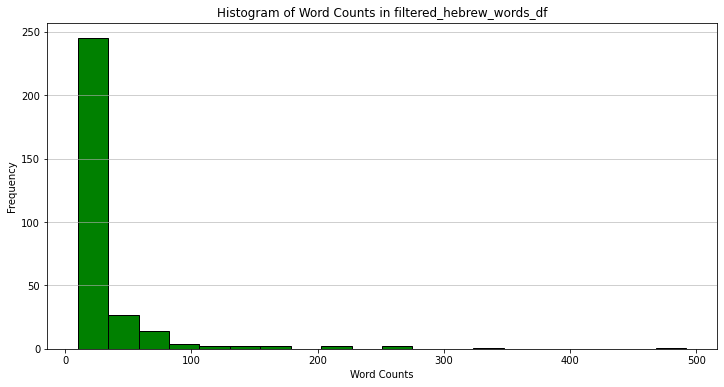

In [24]:
#creating a histogram for filtered_hebrew_words_df:

plt.figure(figsize=(12, 6))
plt.hist(new_filtered_hebrew_words_df['Counts'], bins=20, color='green', edgecolor='black')
plt.xlabel('Word Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in filtered_hebrew_words_df')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [25]:
# Create a DataFrame with 'Words' and 'Counts' columns
histogram_data = pd.DataFrame({
    'Words': new_filtered_hebrew_words_df['Words'],
    'Counts': new_filtered_hebrew_words_df['Counts']
})

# Export the DataFrame to a CSV file
histogram_data.to_csv('histogram_data.csv', index=False)


In [26]:
new_filtered_hebrew_words_df 
new_filtered_hebrew_words_df_copy = new_filtered_hebrew_words_df 

In [27]:
df3 = new_filtered_hebrew_words_df_copy[new_filtered_hebrew_words_df_copy['Words'].str.len() >= 3]
df3.head(10)

Words  Counts
263      אני     156
186      אין      99
4418   מצורף      87
63       אבל      83
141      אחד      82
5706     שלא      80
1617   העורף      77
5675     שיש      76
5772   שמיעה      75
1225  ההודעה      69

In [28]:
#from 302 to 276

In [29]:
#most frequent sender:
df_author = df

most_common_authors = df_author['Author'].value_counts().head(10)
#print(most_common_authors)
most_common_authors

ליהי ברנוי           95
יעל דורון            76
יעקב וובר            70
עידו גרנות           66
אייל חמד             63
מורן פרידמן          57
דבורה בלאו           53
ערן שהם              48
אילן בן נעים         48
~ ספיר אלה סייביץ    46
Name: Author, dtype: int64

In [30]:
most_common_authors = most_common_authors[most_common_authors >= 40]
print(most_common_authors)


ליהי ברנוי           95
יעל דורון            76
יעקב וובר            70
עידו גרנות           66
אייל חמד             63
מורן פרידמן          57
דבורה בלאו           53
ערן שהם              48
אילן בן נעים         48
~ ספיר אלה סייביץ    46
Name: Author, dtype: int64


In [31]:
#לדוגמה ליהי ברנוי מדברת על ביטחון, שעון, אחריות, סייבר, ביטויים על המצב כמו"הרע במיעוטו" או בגלל האויב לא פשוט, 
#מדברת על כך שההתרעות כנראה בפלאפון עובדות טוב אבל בשעונים פחות
#כומתה אדומה
#נשמעת מאוד טעונה ומאוד דעתנית
#דואגת שהקבוצה תהיה פעילה
#השתמשה בביפר כי טוענת שזה הכי אחראי ולא רוצה לקקחת סיכון
#נשמת מבוגרת יותר מהשאר עקב ביטויים ושפה גבוהה-"הרי"
#גם אני אוהבת את עידו ומצדיעה לעידו על פועלו למען הקהילה הוא האיש שאפשר באמת לסמוך הוא האיש הכי נגיש זכינו בך
#גאה ביעקוב אולאיל על היוזמה . וזה מבורך כן ירבו כמוהו. הפריע לי שברווחה לא מבינים שמגיע לכל חירש גם אם יש אדם שומע בסביבה. עובדה התלוננו על זה. וזה לא באשמתך.


In [32]:
#activity by time:
df_time = df
df_time.head(5)

DateTime                     Author  \
0    11.7.2023, 6:56:49  כו"ח - על כל שאלה תשובה 🎼   
1   21.8.2023, 17:32:38                  רועי מרלי   
2   8.10.2023, 22:22:51       יעל גורן (מפילדלפיה)   
3  22.10.2023, 23:15:45                  יניב פיבו   
4  22.10.2023, 23:20:16               ~ M.B.N. ltd   

                                             Message  \
0  ‏ההודעות והשיחות מוצפנות מקצה לקצה. לאף אחד מח...   
1  ‏סקר: חברת *שידורית* זכתה במכרז של משרד הרווחה...   
2  האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...   
3              ‫‏לירית שפיר שמש הסיר/ה את יניב פיבו‬   
4           ‫‏לירית שפיר שמש הסיר/ה את ~ M.B.N. ltd‬   

                                   Tokenized_Message  \
0  [והשיחות, מוצפנות, מקצה, לקצה, לאף, אחד, מחוץ,...   
1  [חברת, שידורית, זכתה, במכרז, של, משרד, הרווחה,...   
2  [האם, יש, אפשרות, באפליקציה, לשנות, את, צליל, ...   
3                              [שפיר, שמש, את, יניב]   
4                                    [שפיר, שמש, את]   

                                        cleaned_text  
0  והשיחות מוצפנות מקצה לקצה לאף אחד הזה אפשרות ל...  
1  חברת שידורית זכתה במכרז משרד הרווחה לאספקת שיר...  
2  האם אפשרות באפליקציה לשנות צליל ההתראה מסירנה ...  
3                                      שפיר שמש יניב  
4                                           שפיר שמש

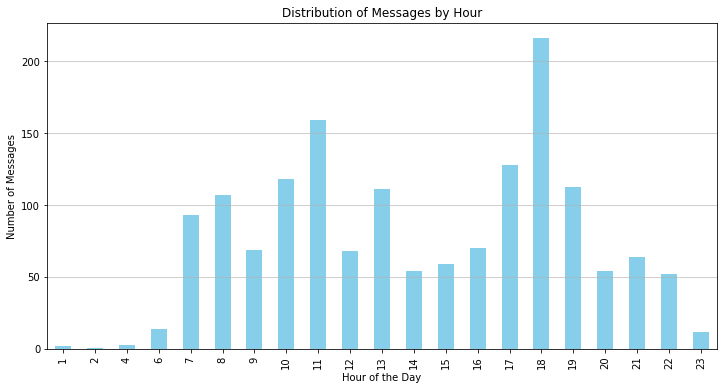

In [33]:
#activity by time:
df_time = df
df_time.head(5)


# Assuming 'your_dataframe' is your DataFrame with a column 'MessageTime'
# Convert the 'MessageTime' column to a datetime object if it's not already
df_time['DateTime'] = pd.to_datetime(df_time['DateTime'])

# Extract the hour from the timestamp
df_time['Hour'] = df_time['DateTime'].dt.hour

# Plot the message distribution by hour
plt.figure(figsize=(12, 6))
df_time['Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.title('Distribution of Messages by Hour')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [34]:
#conclusions from the lochesh la chet:
#in the evening th activity is more intens->
#we can conclude that deaf people are most likely in a work schedgual -> 
#and have more time to chat after work


In [35]:
#trying to do wordcloud
#

<ipython-input-36-118d07ab2bfa>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Cluster'] = kmeans.labels_


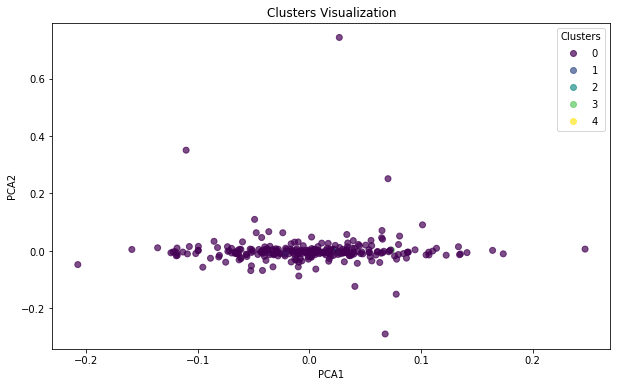

In [36]:
# Assuming 'your_dataframe' has a 'Words' column
corpus = df3['Words'].tolist()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# K-Means Clustering
num_clusters = 5  # Adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df3['Cluster'] = kmeans.labels_

# Visualize Clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Create a DataFrame for visualization
visualization_df = pd.DataFrame(reduced_features, columns=['PCA1', 'PCA2'])
visualization_df['Cluster'] = kmeans.labels_

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(visualization_df['PCA1'], visualization_df['PCA2'], c=visualization_df['Cluster'], cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization')
plt.show()


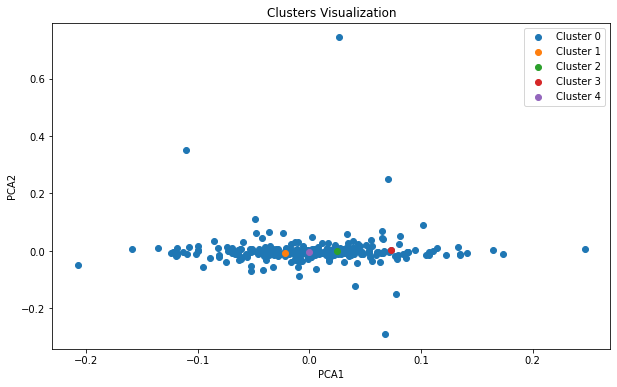

In [37]:
# Plot clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = visualization_df[visualization_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Clusters Visualization')
plt.legend()
plt.show()



in this section we used WordCloud on the data (in my pc i was not able to run this code due to probloms with the fonts but we managed to run it on Shimon's pc):

def join_lists_of_words(lst):
    return ' '.join(lst)
df1['Tokenized_Message'] = df1['Tokenized_Message'].apply(join_lists_of_words)
wordcloud = WordCloud(
        font_path = 'NotoSansHebrew.ttf',
        background_color='white',
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1).generate(' '.join(df1['Tokenized_Message']))
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

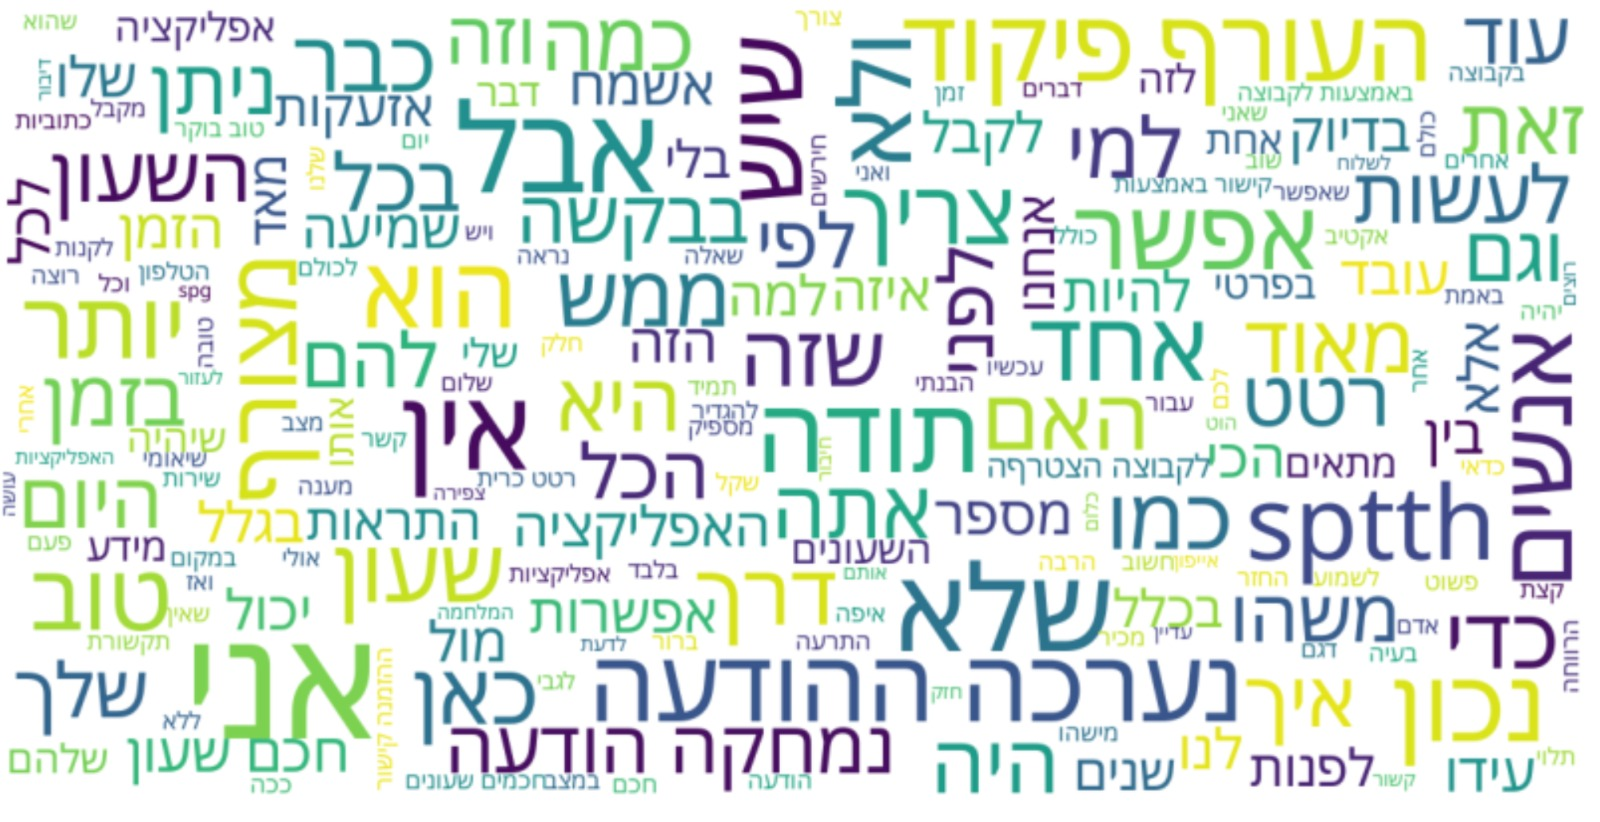

In [38]:
from IPython.display import Image, display

# Replace 'path/to/your/image.jpg' with the actual path to your JPEG file
image_path = 'wordCloudProof.jpeg'

# Display the image
display(Image(filename=image_path))


<ipython-input-40-470194651dca>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Cluster'] = kmeans.labels_


Cluster Assignments:
       Words  Counts  Cluster
263      אני     156        0
186      אין      99        0
4418   מצורף      87        0
63       אבל      83        0
141      אחד      82        0
...      ...     ...      ...
1829  השמיעה      10        0
175     אייל      10        0
5122     צבע      10        0
1469   המידע      10        0
4119  מחלקים      10        0

[276 rows x 3 columns]


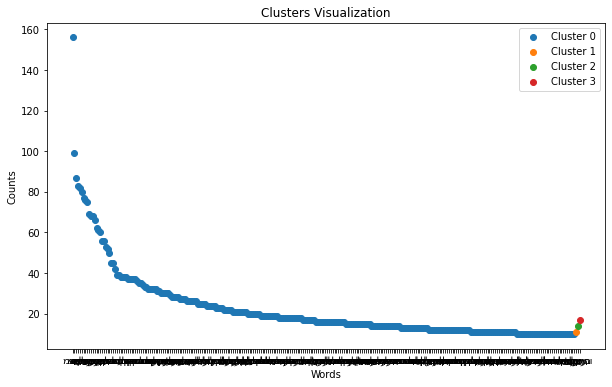

In [40]:
corpus = df3['Words'].astype(str).tolist()

# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# K-Means Clustering
num_clusters = 4  # Adjust the number of clusters based on your requirements
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df3['Cluster'] = kmeans.labels_

# Explore the cluster assignments
print("Cluster Assignments:")
print(df3[['Words', 'Counts', 'Cluster']])

# Visualize Clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df3[df3['Cluster'] == cluster]
    plt.scatter(cluster_data['Words'], cluster_data['Counts'], label=f'Cluster {cluster}')

plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Clusters Visualization')
plt.legend()
plt.show()


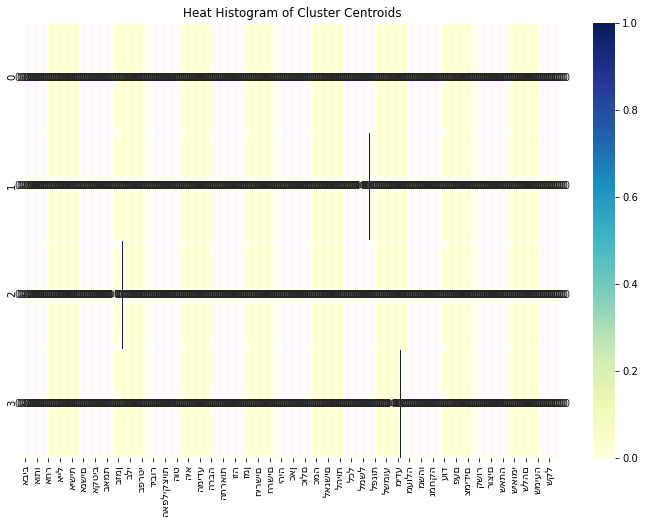

In [125]:
# Plot Heat Histogram
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=vectorizer.get_feature_names())

plt.figure(figsize=(12, 8))
sns.heatmap(centroids_df, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heat Histogram of Cluster Centroids')
plt.show()

In [42]:
#as we can see above, the 3 clusters gives the feeling that
#they are looking for someone to listen to them

In [143]:
# Print Cluster 0 details
cluster = 0  
cluster_data = df3[df3['Cluster'] == cluster]

print(f"Cluster {cluster} Details:")
print(cluster_data[['Counts','Words']])


Cluster 0 Details:
      Counts   Words
263      156     אני
186       99     אין
4418      87   מצורף
63        83     אבל
141       82     אחד
...      ...     ...
1829      10  השמיעה
175       10    אייל
5122      10     צבע
1469      10   המידע
4119      10  מחלקים

[273 rows x 2 columns]


In [44]:
# Get cluster centroids
cluster_centroids = kmeans.cluster_centers_

# Find top features for each cluster
top_features_per_cluster = []
for cluster_idx in range(num_clusters):
    top_feature_indices = cluster_centroids[cluster_idx].argsort()[-5:][::-1] 
    top_features = [vectorizer.get_feature_names()[idx] for idx in top_feature_indices]
    top_features_per_cluster.append(top_features)

print("Top Features for Each Cluster:")
for cluster, top_features in enumerate(top_features_per_cluster):
    print(f"Cluster {cluster}: {top_features}")


Top Features for Each Cluster:
Cluster 0: ['תקשורת', 'העורף', 'הכל', 'הכתוביות', 'המידע']
Cluster 1: ['לעזור', 'תקשורת', 'המצב', 'הכי', 'הכל']
Cluster 2: ['בית', 'המצב', 'הכי', 'הכל', 'הכתוביות']
Cluster 3: ['מישהו', 'תקשורת', 'המספר', 'הכי', 'הכל']


In [45]:
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize each message into both words and sentences
word_token = df_token['Tokenized_Words'] = df_token['Message'].apply(word_tokenize)
sen_token = df_token['Tokenized_Sentences'] = df_token['Message'].apply(sent_tokenize)



<ipython-input-45-2818962c2750>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  word_token = df_token['Tokenized_Words'] = df_token['Message'].apply(word_tokenize)


In [46]:
!pip install textblob


In [49]:
#creating a df for the timestamp 
timestamp_df = df
timestamp_df = pd.read_csv('pd.csv')
#timestamp_df

datetime_column = timestamp_df['DateTime']

# Display the 'DateTime' column
#print(datetime_column)

datetime_column

0         11.7.2023, 6:56:49
1        21.8.2023, 17:32:38
2        8.10.2023, 22:22:51
3       22.10.2023, 23:15:45
4       22.10.2023, 23:20:16
                ...         
1562     7.11.2023, 11:40:51
1563     7.11.2023, 11:41:06
1564     7.11.2023, 11:41:16
1565     7.11.2023, 12:00:33
1566     7.11.2023, 13:11:19
Name: DateTime, Length: 1567, dtype: object

In [50]:
# Sort the DataFrame by the 'DateTime' column
timestamp_df_sorted = timestamp_df.sort_values(by='DateTime')

# Display the sorted DataFrame
#print(timestamp_df_sorted)
timestamp_df_sorted

DateTime                Author  \
860   1.11.2023, 10:43:03              אייל חמד   
861   1.11.2023, 10:46:55             יעל דורון   
862   1.11.2023, 11:16:18              אייל חמד   
863   1.11.2023, 12:47:40           מורן פרידמן   
864   1.11.2023, 12:51:32                 מירית   
...                   ...                   ...   
1509   7.11.2023, 8:51:18               ~ יונתן   
1510   7.11.2023, 8:59:56             סמדר הרוש   
1511   7.11.2023, 9:00:57            ליאת וינטר   
1512   7.11.2023, 9:03:11     ~ lugassi liron81   
2     8.10.2023, 22:22:51  יעל גורן (מפילדלפיה)   

                                                Message  
860   אפליקציית פיקוד העורף לא עושה העבודה שלה,  זה ...  
861   המקור זה פיקוד העורף - זה דבר אחד. דבר שני לא ...  
862       https://www.ynet.co.il/news/article/s10nd90gt  
863                     לא כתובה שם המלצה לא להשתמש בה.  
864   יש פיקציה שנקראת צבע אדום היא מעולה לשימוש !! ...  
...                                                 ...  
1509  מסכים, כל אחד ומה שהוא מעדיף, גם יכול להיות שס...  
1510   כל הכבוד שירלי,  איך אנו יכולים לקבל את הצמידים?  
1511  אם הבנתי נכון הצמידים נתרמו לאח"א והם מחלקים א...  
1512  ‫‏~ lugassi liron81 הצטרף/ה לקבוצה באמצעות קיש...  
2     האם יש אפשרות באפליקציה לשנות את צליל ההתראה מ...  

[1567 rows x 3 columns]

In [51]:
#our timestamp is form: 8.10.2023 to-> 1.11.2023 - about a month

In [117]:
#now we'll find out the number of messegaes in each day:

timestamp_df['DateTime'] = pd.to_datetime(timestamp_df['DateTime'])

# Extract date from datetime
timestamp_df['Date'] = timestamp_df['DateTime'].dt.date

# Group by date and count messages
messages_per_day = timestamp_df.groupby('Date')['Message'].count().reset_index()

# Display the result
#print(messages_per_day)
#messages_per_day

In [116]:
sorted_mPd = messages_per_day.sort_values(by='Date')
#sorted_mPd

In [115]:
# Convert 'Date' column to datetime format if not already
messages_per_day['Date'] = pd.to_datetime(messages_per_day['Date'])

# Sort the DataFrame by 'Date' in ascending order by month
messages_per_day.sort_values(by='Date', ascending=True, inplace=True)

# Display the sorted DataFrame
#print(messages_per_day)


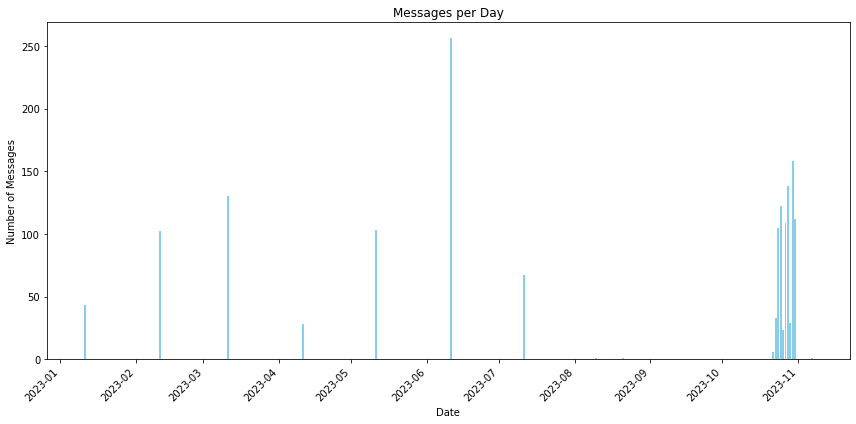

In [55]:
from matplotlib.dates import DateFormatter

# Assuming 'Date' and 'Message' are the columns in messages_per_day
x = pd.to_datetime(messages_per_day['Date'])
y = messages_per_day['Message']

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue')
plt.title('Messages per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages')

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


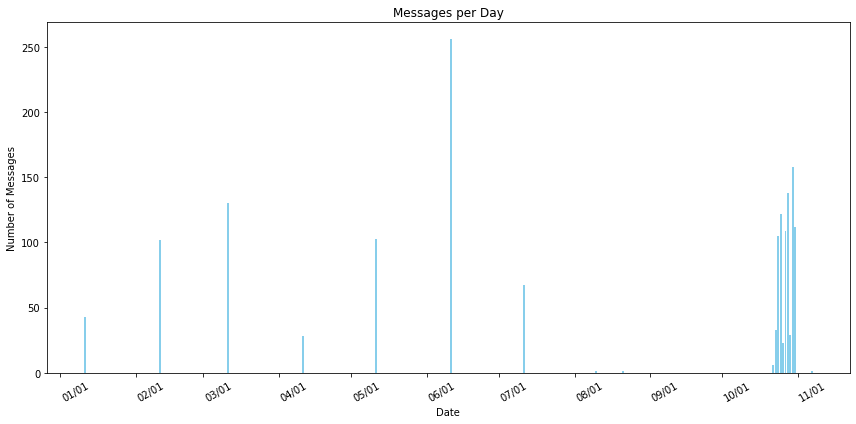

In [56]:
data = {
    'Date': pd.to_datetime(['2023-01-11', '2023-02-11', '2023-03-11', '2023-04-11', '2023-05-11',
                             '2023-06-11', '2023-07-11', '2023-08-10', '2023-08-21', '2023-10-22',
                             '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
                             '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-07']),
    'Message': [43, 102, 130, 28, 103, 256, 67, 1, 1, 6, 33, 105, 122, 23, 109, 138, 29, 158, 112, 1]
}

messages_per_day_df = pd.DataFrame(data)

# Set 'Date' column as the index
messages_per_day_df.set_index('Date', inplace=True)

# Plotting
x = messages_per_day_df.index
y = messages_per_day_df['Message']

plt.figure(figsize=(12, 6))
plt.bar(x, y, color='skyblue', width=0.8)  # Add width parameter to avoid ValueError
plt.title('Messages per Day')
plt.xlabel('Date')
plt.ylabel('Number of Messages')

# Format the x-axis dates
date_format = DateFormatter("%m/%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=30, ha="left")

plt.tight_layout()
plt.show()


In [57]:
!pip install plotly


In [58]:
import plotly.express as px

# Assuming messages_per_day_df is your DataFrame
messages_per_day_df['Date'] = messages_per_day_df.index
fig = px.bar(messages_per_day_df, x='Date', y='Message', labels={'Date': 'Date', 'Message': 'Number of Messages'},
             title='Messages per Day', width=800, height=400)

# Format the x-axis dates
fig.update_xaxes(type='category')

# Show the plot
fig.show()


In [59]:
#in this section we are doing timestamp of the messeges:
#number of messegaes in a day is:
#visualize on a graph like this:
#x=every day 
#y=

In [60]:
messages_per_day

Date  Message
0  2023-01-11       43
1  2023-02-11      102
2  2023-03-11      130
3  2023-04-11       28
4  2023-05-11      103
5  2023-06-11      256
6  2023-07-11       67
7  2023-08-10        1
8  2023-08-21        1
9  2023-10-22        6
10 2023-10-23       33
11 2023-10-24      105
12 2023-10-25      122
13 2023-10-26       23
14 2023-10-27      109
15 2023-10-28      138
16 2023-10-29       29
17 2023-10-30      158
18 2023-10-31      112
19 2023-11-07        1

In [61]:
#now we'll find out the number of messegaes in each day:

timestamp_df['DateTime'] = pd.to_datetime(timestamp_df['DateTime'])

# Extract date from datetime
timestamp_df['Date'] = timestamp_df['DateTime'].dt.date

# Group by date and count messages
new_Mperday = timestamp_df.groupby('Date')['Message'].count().reset_index()
new_Mperday

Date  Message
0   2023-01-11       43
1   2023-02-11      102
2   2023-03-11      130
3   2023-04-11       28
4   2023-05-11      103
5   2023-06-11      256
6   2023-07-11       67
7   2023-08-10        1
8   2023-08-21        1
9   2023-10-22        6
10  2023-10-23       33
11  2023-10-24      105
12  2023-10-25      122
13  2023-10-26       23
14  2023-10-27      109
15  2023-10-28      138
16  2023-10-29       29
17  2023-10-30      158
18  2023-10-31      112
19  2023-11-07        1

In [62]:
data = {'Date': ['2023-01-11', '2023-02-11', '2023-03-11', '2023-04-11', '2023-05-11',
                 '2023-06-11', '2023-07-11', '2023-08-10', '2023-08-21', '2023-10-22',
                 '2023-10-23', '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
                 '2023-10-28', '2023-10-29', '2023-10-30', '2023-10-31', '2023-11-07'],
        'Message': [43, 102, 130, 28, 103, 256, 67, 1, 1, 6, 33, 105, 122, 23, 109, 138, 29, 158, 112, 1]}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

# Create a Plotly figure
fig = px.bar(df, x='Date', y='Message', text='Message',
             title='Number of Messages per Day',
             labels={'Message': 'Number of Messages'})

# Customize the date format
fig.update_layout(xaxis=dict(tickformat='%d/%m'))

# Show the figure
fig.show()


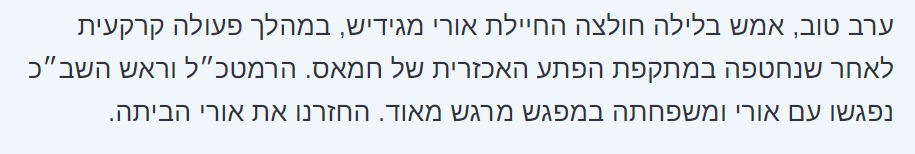

In [63]:
#30.10-ori
from IPython.display import Image, display

# Specify the path to your image file
image_path = 'ori.jpg'  # Replace with your actual image path

# Display the image
display(Image(filename=image_path))


In [64]:
#06.11
#שיחה על שעונים


## Sentimental Analysing

In [65]:
!pip install transformers
!pip install torch torchvision torchaudio
!pip install tensorflow

  Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.10.0 which is incompatible.


  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.10.0
    Uninstalling typing-extensions-4.10.0:
      Successfully uninstalled typing-extensions-4.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.


In [66]:
sentiment_df = df
sentiment_df

Date  Message
0  2023-01-11       43
1  2023-02-11      102
2  2023-03-11      130
3  2023-04-11       28
4  2023-05-11      103
5  2023-06-11      256
6  2023-07-11       67
7  2023-08-10        1
8  2023-08-21        1
9  2023-10-22        6
10 2023-10-23       33
11 2023-10-24      105
12 2023-10-25      122
13 2023-10-26       23
14 2023-10-27      109
15 2023-10-28      138
16 2023-10-29       29
17 2023-10-30      158
18 2023-10-31      112
19 2023-11-07        1

In [67]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
!pip install --upgrade torch

model_name = "avichr/heBERT_sentiment_analysis"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
from transformers import AutoModelForSequenceClassification, AutoTokenizer

  Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.10.0 which is incompatible.


config.json:   0%|          | 0.00/677 [00:00<?, ?B/s]

C:\Users\ortal\anaconda3\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning:

`huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ortal\.cache\huggingface\hub\models--avichr--heBERT_sentiment_analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development



vocab.txt:   0%|          | 0.00/299k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [77]:
from transformers import AutoTokenizer, AutoModel, pipeline
tokenizer = AutoTokenizer.from_pretrained("avichr/heBERT_sentiment_analysis") #same as 'avichr/heBERT' tokenizer
model = AutoModel.from_pretrained("avichr/heBERT_sentiment_analysis")

sentiment_analysis = pipeline(
    "sentiment-analysis",
    model="avichr/heBERT_sentiment_analysis",
    tokenizer="avichr/heBERT_sentiment_analysis",
    return_all_scores = True
)
# Perform sentiment analysis for each sentence
sentiment_scores = []

for message in df4['Message']:
    # Tokenize the message with maximum length specified
    result = sentiment_analysis(message, max_length=512,truncation=True)
    sentiment_scores.append(result)

C:\Users\ortal\anaconda3\lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning:

`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.



In [80]:
sentiment_scores

[[[{'label': 'neutral', 'score': 0.5367892980575562},
   {'label': 'positive', 'score': 0.001893955166451633},
   {'label': 'negative', 'score': 0.4613167345523834}]],
 [[{'label': 'neutral', 'score': 0.9981617331504822},
   {'label': 'positive', 'score': 0.0006197330658324063},
   {'label': 'negative', 'score': 0.0012185689993202686}]],
 [[{'label': 'neutral', 'score': 0.9991581439971924},
   {'label': 'positive', 'score': 0.0005092598730698228},
   {'label': 'negative', 'score': 0.00033250110573135316}]],
 [[{'label': 'neutral', 'score': 0.012260234914720058},
   {'label': 'positive', 'score': 0.7941265106201172},
   {'label': 'negative', 'score': 0.1936131864786148}]],
 [[{'label': 'neutral', 'score': 0.002860515145584941},
   {'label': 'positive', 'score': 0.0008739575860090554},
   {'label': 'negative', 'score': 0.9962655901908875}]],
 [[{'label': 'neutral', 'score': 0.025779129937291145},
   {'label': 'positive', 'score': 0.7557356357574463},
   {'label': 'negative', 'score': 0.2

In [89]:
# Extract numerical scores
numerical_scores_array = [
    [entry['score'] for entry in score_entry[0]] for score_entry in sentiment_scores
]

# Display the new array
print(numerical_scores_array)

[[0.5367892980575562, 0.001893955166451633, 0.4613167345523834], [0.9981617331504822, 0.0006197330658324063, 0.0012185689993202686], [0.9991581439971924, 0.0005092598730698228, 0.00033250110573135316], [0.012260234914720058, 0.7941265106201172, 0.1936131864786148], [0.002860515145584941, 0.0008739575860090554, 0.9962655901908875], [0.025779129937291145, 0.7557356357574463, 0.2184852510690689], [0.00023318540479522198, 0.0005080706905573606, 0.9992586970329285], [0.012628384865820408, 0.6464493870735168, 0.34092220664024353], [0.0007339806179516017, 0.001091991551220417, 0.9981740713119507], [0.09930387884378433, 0.9004180431365967, 0.00027800872339867055], [0.0009049515938386321, 0.9990193843841553, 7.566913700429723e-05], [0.0032979787793010473, 0.00014874707267154008, 0.9965533018112183], [0.9984548091888428, 0.0008582324371673167, 0.0006868384080007672], [0.00017252365068998188, 0.9997310042381287, 9.637102630222216e-05], [0.0006701455567963421, 0.999211311340332, 0.0001184897555503

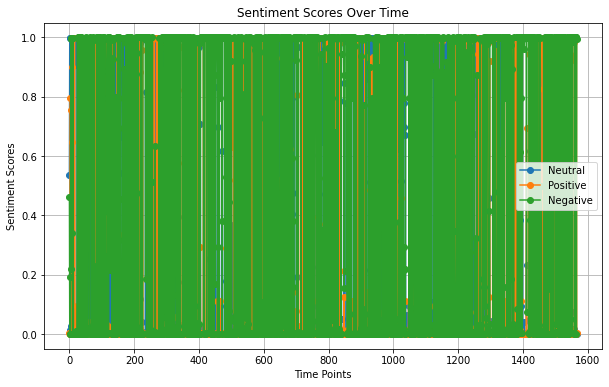

In [112]:
# Convert the numerical scores array to a NumPy array for easier manipulation
scores_np_array = np.array(numerical_scores_array)

# Extract scores for each sentiment category
neutral_scores = scores_np_array[:, 0]
positive_scores = scores_np_array[:, 1]
negative_scores = scores_np_array[:, 2]

# Create time points (replace with your actual time points)
time_points = np.arange(len(numerical_scores_array))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_points, neutral_scores, label='Neutral', marker='o')
plt.plot(time_points, positive_scores, label='Positive', marker='o')
plt.plot(time_points, negative_scores, label='Negative', marker='o')

plt.xlabel('Time Points')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Scores Over Time')
plt.legend()
plt.grid(True)
plt.show()


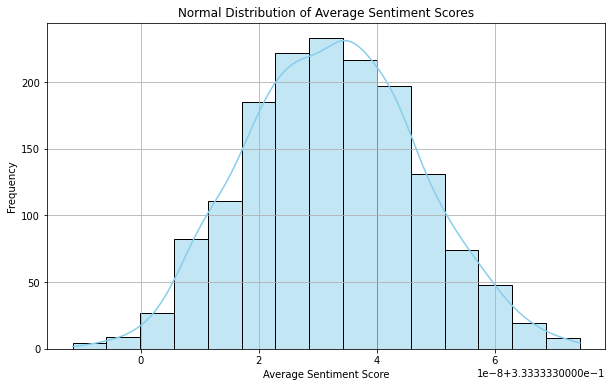

In [113]:
# Convert the numerical scores array to a NumPy array for easier manipulation
scores_np_array = np.array(numerical_scores_array)

# Calculate the average sentiment score for each row
average_scores = np.mean(scores_np_array, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(average_scores, kde=True, color='skyblue', bins=15)
plt.xlabel('Average Sentiment Score')
plt.ylabel('Frequency')
plt.title('Normal Distribution of Average Sentiment Scores')
plt.grid(True)
plt.show()

In [114]:
# Convert the numerical scores array to a NumPy array for easier manipulation
scores_np_array = np.array(numerical_scores_array)

# Calculate the average sentiment score for each row
average_scores = np.mean(scores_np_array, axis=1)

# Calculate the overall average sentiment score
overall_average_score = np.mean(average_scores)

print(f"Average Sentiment Score: {overall_average_score}")

Average Sentiment Score: 0.33333333241877555


In [151]:
df_clustering = cluster_data0[['Words']]
df_clustering
df_clustering.to_csv('0.csv', index=False, encoding='utf-8')


In [139]:
df_clustering = cluster_data0[['Words']]
df_clustering
df_clustering.to_csv('1.csv', index=False, encoding='utf-8')


In [140]:
df_clustering = cluster_data0[['Words']]
df_clustering
df_clustering.to_csv('2.csv', index=False, encoding='utf-8')


In [141]:
df_clustering = cluster_data0[['Words']]
df_clustering
df_clustering.to_csv('3.csv', index=False, encoding='utf-8')


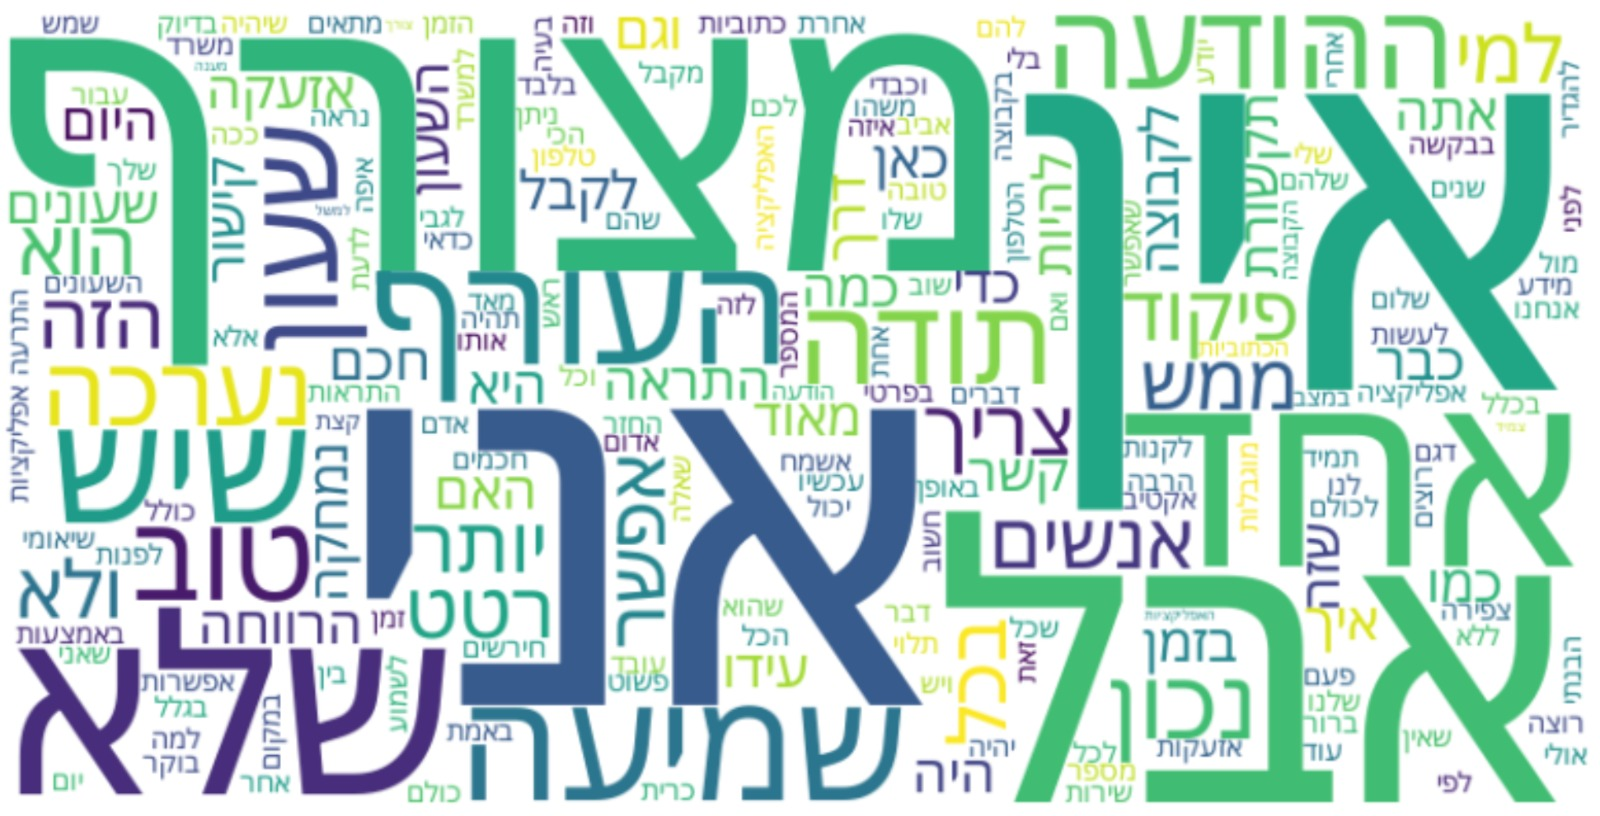

In [153]:
# Specify the path to your image file
image_path0 = '0_wordcloud.jpeg'  


# Display the image
display(Image(filename=image_path0))


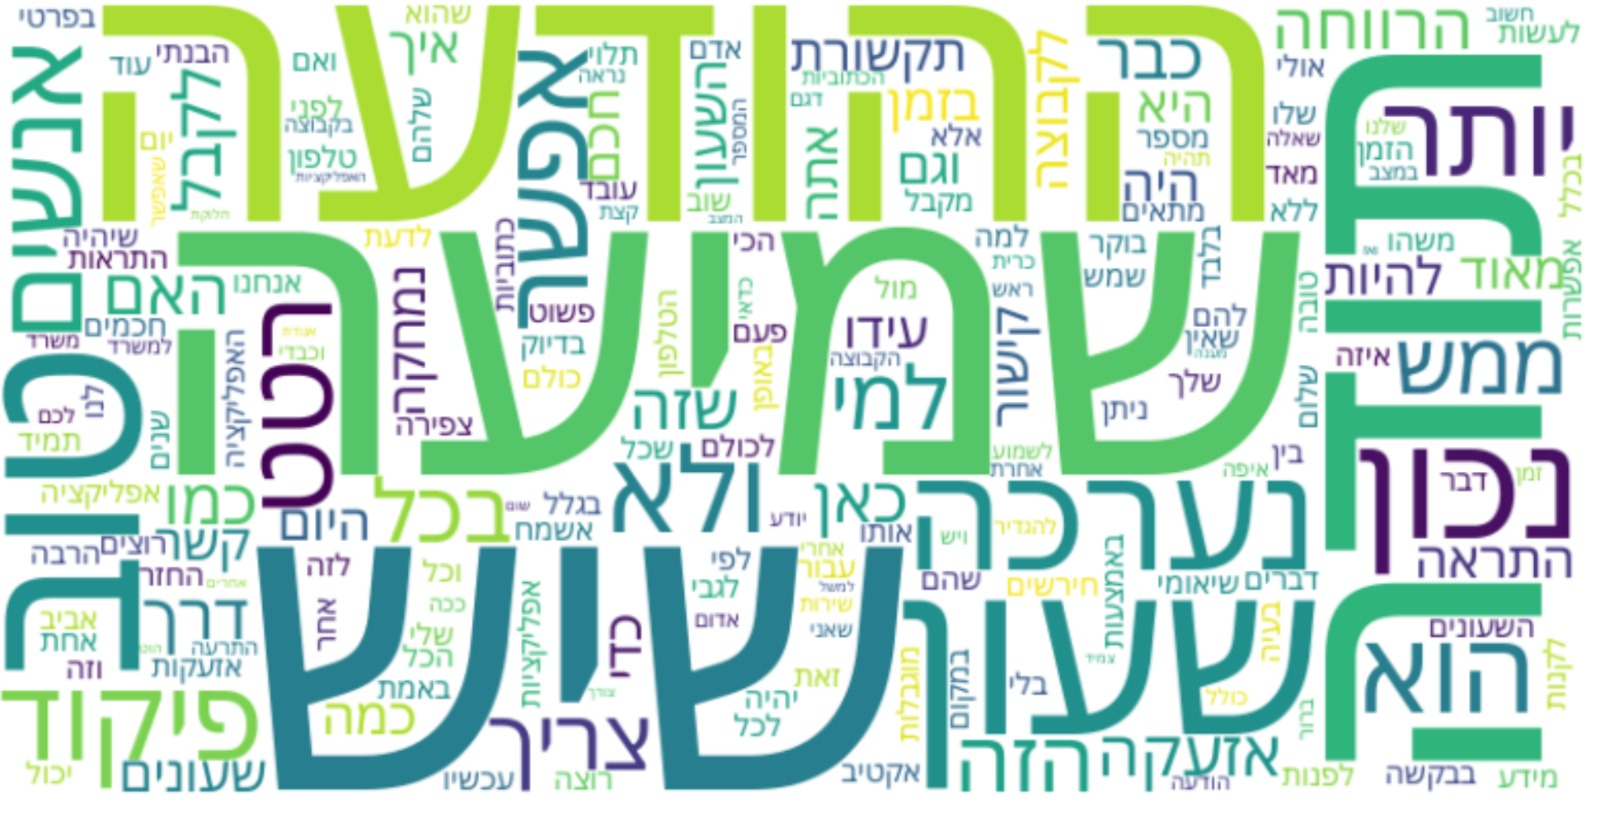

In [154]:
image_path1 = '1_wordcloud.jpeg'  
display(Image(filename=image_path1))


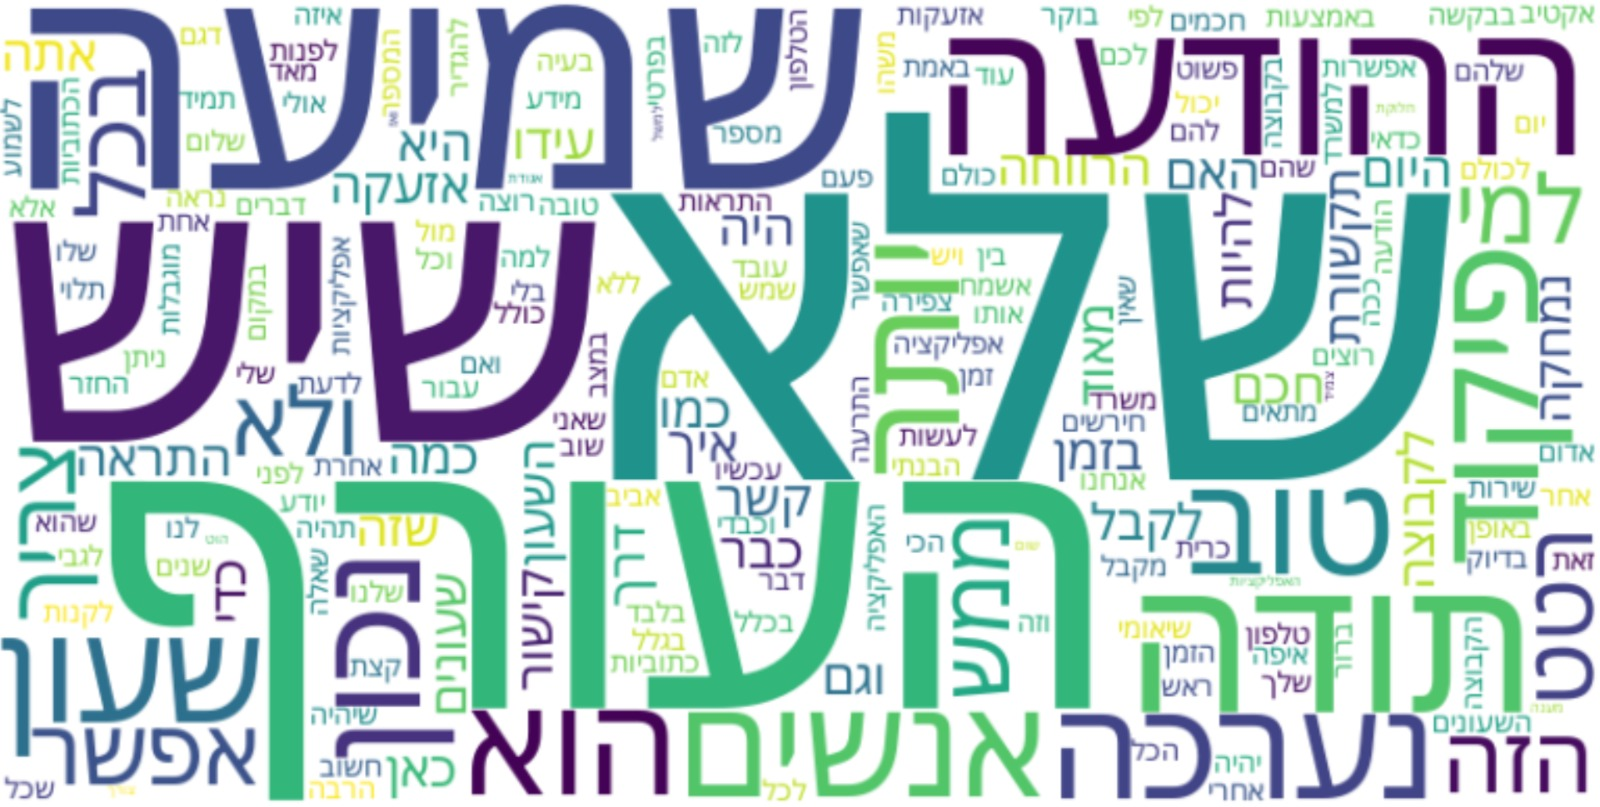

In [155]:
image_path2 = '2_wordcloud.jpeg' 
display(Image(filename=image_path2))



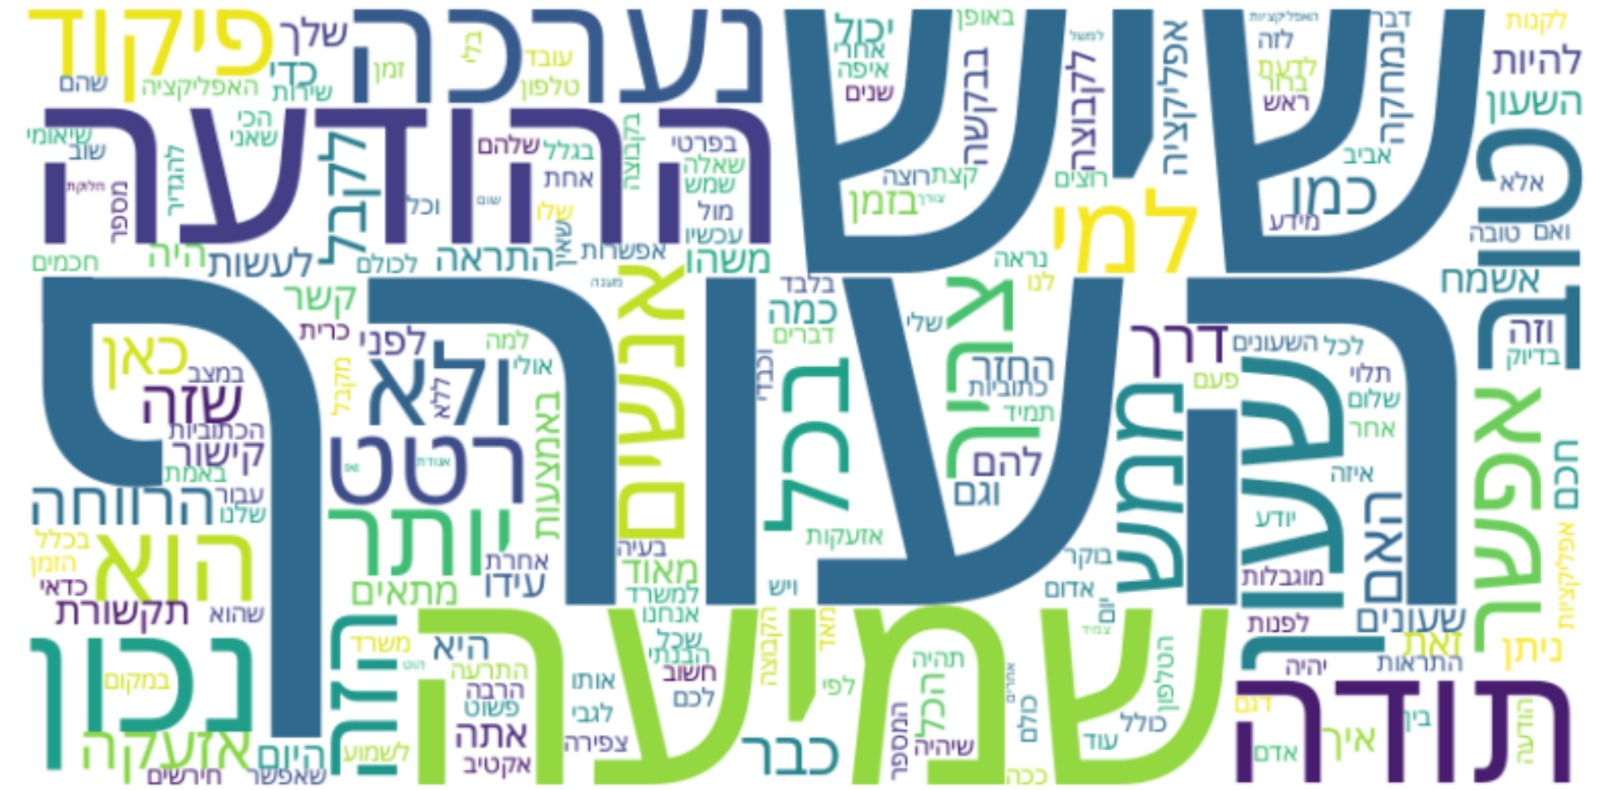

In [157]:
image_path3 = '3_wordcloud.jpeg'  
display(Image(filename=image_path3))